<a href="https://colab.research.google.com/github/hafizhperdana/TugasBesarProbstat/blob/main/Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tugas Besar IF2120 Probabilitas dan Statistika 2025/2026**

### Topik : **Life-Style**


K01 - Kelompok 31

Anggota Kelompok :
1. Moh. Hafizh Irham Perdana - 13524025
2. A. Fawwaz Azam Wicaksono - 13524070

## Petunjuk
1. Silahkan **buat salinan** template notebook ini untuk mengerjakan.
2. Kalian dapat menambahkan blok code atau blok markdown baru jika diperlukan.
3. Selamat mengerjakan! 😸

## Inisialisasi Dependencies dan Load Data

Import required libraries

In [ ]:
# Sesuaikan dengan kebutuhan, uncomment yang perlu, hapus yang ga perlu, dan tambahkan jika perlu
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Load Data

In [ ]:
import gdown

# Ambil file_id dari link gdrive dataset
# https://drive.google.com/file/d/1UmbA42IocF4drZDSwcn2tF9zXgLZmhoM/view?usp=sharing -> file_id = 1UmbA42IocF4drZDSwcn2tF9zXgLZmhoM

# Kemudian, masukan file_id dengan template url berikut
# https://drive.google.com/uc?id=1UmbA42IocF4drZDSwcn2tF9zXgLZmhoM

url = "https://drive.google.com/uc?id=1UmbA42IocF4drZDSwcn2tF9zXgLZmhoM"

output = "Life-Style.csv"
gdown.download(url, output, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1UmbA42IocF4drZDSwcn2tF9zXgLZmhoM
To: d:\Kuliah\Akademik\Semester 3\Probabilitas dan Statistika\Tugas\Tubes\TugasBesarProbstat\Life-Style.csv
100%|██████████| 233k/233k [00:00<00:00, 4.46MB/s]


'Life-Style.csv'

In [ ]:
data = pd.read_csv(output)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       2000 non-null   float64
 1   Gender                    2000 non-null   object 
 2   Weight (kg)               2000 non-null   float64
 3   Height (m)                2000 non-null   float64
 4   Avg_BPM                   2000 non-null   float64
 5   Session_Duration (hours)  2000 non-null   float64
 6   Calories_Burned           2000 non-null   float64
 7   Workout_Type              2000 non-null   object 
 8   Fat_Percentage            2000 non-null   float64
 9   Carbs                     2000 non-null   float64
 10  Proteins                  2000 non-null   float64
 11  Fats                      2000 non-null   float64
 12  Calories                  2000 non-null   float64
 13  BMI                       2000 non-null   float64
 14  diet_typ

# Soal General

## Nomor 1
Menulis deskripsi statistika (Descriptive Statistics) dari semua kolom pada data.
- Data yang bersifat numerik dapat diberikan nilai mean, median, modus, standar deviasi, variansi, range, nilai minimum, maksimum, kuartil, IQR, skewness dan kurtosis.
- Data yang bersifat kategorikal dapat dicari unique values, dan proporsi nya.

### Implementasi Menggunakan Fungsi Buatan Sendiri

Data Numerik

In [ ]:
print("\nData numerik menggunakan implementasi sendiri")

# FUNGSI
def mean(series):
    return series.sum() / len(series)

def median(series):
    sorted_series = series.sort_values().reset_index(drop=True)
    n = len(sorted_series)
    # Rumus median
    mid = n // 2
    if n % 2 == 0:
        return (sorted_series[mid - 1] + sorted_series[mid]) / 2
    else:
        return sorted_series[mid]

def modus(series):
    counts = series.value_counts()
    max_count = counts.max()
    modus = counts[counts == max_count].index.tolist()
    if len(modus) == len(counts):
        return None
    return modus

def std(series):
    mu = mean(series)
    # Rumus standar deviasi 
    variance = ((series - mu) ** 2).sum() / (len(series) - 1)
    std = np.sqrt(variance)
    return std

def var(series):
    mu = mean(series)
    # Rumus varians 
    variance = ((series - mu) ** 2).sum() / (len(series) - 1)
    return variance

def range(series):
    return series.max() - series.min()

def min(series):
    return series.min()

def max(series):
    return series.max()

def kuartil(series, q):
    sorted_series = series.sort_values().reset_index(drop=True)
    n = len(sorted_series)
    # Rumus kuartil dengan q adalah 0.25 (Q1), 0.5 (Q2/Median), 0.75 (Q3)
    pos = (n + 1) * q
    if pos.is_integer():
        return sorted_series[int(pos) - 1]
    else:
        lower = sorted_series[int(pos) - 1]
        upper = sorted_series[int(pos)]
        return lower + (upper - lower) * (pos - int(pos))

def IQR(series):
    Q1 = kuartil(series, 0.25)
    Q3 = kuartil(series, 0.75)
    return Q3 - Q1

def skewness(series):
    mu = mean(series)
    sigma = std(series)
    n = len(series)
    # menggunakan Pearson’s Moment Coefficient of Skewness
    skew = ((series - mu) ** 3).sum() / (n * (sigma ** 3))
    return skew

def kurtosis(series):
    mu = mean(series)
    sigma = std(series)
    n = len(series)
    # mennggunakan Fisher's Kurtosis
    kurt = ((series - mu) ** 4).sum() / (n * (sigma ** 4)) - 3
    return kurt

# IMPLEMENTASI
def print_stats(series):
    print(f"Statistik untuk {series.name}:")
    print(f"Mean: {mean(series)}")
    print(f"Median: {median(series)}")
    modus_result = modus(series)
    if modus_result is None:
        print("Modus: Tidak ada modus (semua nilai unik)")
    else:
        print(f"Modus: {modus_result}")
    print(f"Standar Deviasi: {std(series)}")
    print(f"Varians: {var(series)}")
    print(f"Range: {range(series)}")
    print(f"Min: {min(series)}")
    print(f"Max: {max(series)}")
    print(f"Kuartil 1 (Q1): {kuartil(series, 0.25)}")
    print(f"Kuartil 2 (Q2/Median): {kuartil(series, 0.5)}")
    print(f"Kuartil 3 (Q3): {kuartil(series, 0.75)}")
    print(f"IQR: {IQR(series)}")
    print(f"Skewness: {skewness(series)}")
    print(f"Kurtosis: {kurtosis(series)}")
    
for col in data.select_dtypes(include=[np.number]).columns:
    print_stats(data[col])
    print("\n")

# def table_stats(series):
#     nilai_modus = modus(series)
#     if isinstance(nilai_modus, list) or isinstance(nilai_modus, np.ndarray):
#         nilai_modus = str(nilai_modus)
#     stats = pd.DataFrame({
#         "Mean": mean(series),
#         "Median": median(series),
#         "Modus": modus(series),
#         "Standar Deviasi": std(series),
#         "Varians": var(series),
#         "Range": range(series),
#         "Min": min(series),
#         "Max": max(series),
#         "Kuartil 1 (Q1)": kuartil(series, 0.25),
#         "Kuartil 2 (Q2/Median)": kuartil(series, 0.5),
#         "Kuartil 3 (Q3)": kuartil(series, 0.75),
#         "IQR": IQR(series),
#         "Skewness": skewness(series),
#         "Kurtosis": kurtosis(series)
#     })
#     return stats

# print("\nTabel Statistik Deskriptif untuk Data Numerik:")
# for col in data.select_dtypes(include=[np.number]).columns:
#     print(f"\nKolom: {col}")
#     print(table_stats(data[col]))



Data numerik menggunakan implementasi sendiri
Statistik untuk Age:
Mean: 38.93884
Median: 39.915
Modus: [18.0]
Standar Deviasi: 12.09360638983079
Varians: 146.2553155121561
Range: 41.41
Min: 18.0
Max: 59.41
Kuartil 1 (Q1): 28.26
Kuartil 2 (Q2/Median): 39.915
Kuartil 3 (Q3): 49.7875
IQR: 21.5275
Skewness: -0.11318481373554645
Kurtosis: -1.193879700678127


Statistik untuk Weight (kg):
Mean: 73.819975
Median: 69.15
Modus: [88.13]
Standar Deviasi: 21.47618538797764
Varians: 461.2265388187844
Range: 91.23000000000002
Min: 39.32
Max: 130.55
Kuartil 1 (Q1): 58.0
Kuartil 2 (Q2/Median): 69.15
Kuartil 3 (Q3): 86.44999999999999
IQR: 28.44999999999999
Skewness: 0.7982443795815005
Kurtosis: -0.042532776259933236


Statistik untuk Height (m):
Mean: 1.7211349999999999
Median: 1.71
Modus: [1.68]
Standar Deviasi: 0.12620945363994746
Varians: 0.015928826188094044
Range: 0.5199999999999998
Min: 1.49
Max: 2.01
Kuartil 1 (Q1): 1.62
Kuartil 2 (Q2/Median): 1.71
Kuartil 3 (Q3): 1.8
IQR: 0.17999999999999994


Data Kategorikal

In [ ]:
print("\nData kategorikal menggunakan implementasi sendiri")

def table(series):
    counts = series.value_counts()
    table = pd.DataFrame({
        'Nilai': counts.index,
        'Frekuensi': counts.values,
        'Relatif (%)': (counts.values / len(series)) * 100,
        'Proporsi': counts.values / len(series)
    })
    return table

print("\nTabel frekuensi dan proporsi untuk data kategorikal:")
for col in data.select_dtypes(include=['object', 'category']).columns:
    print(f"\nKolom: {col}")
    print(table(data[col]))



Data kategorikal menggunakan implementasi sendiri

Tabel frekuensi dan proporsi untuk data kategorikal:

Kolom: Gender
    Nilai  Frekuensi  Relatif (%)  Proporsi
0    Male       1021        51.05    0.5105
1  Female        979        48.95    0.4895

Kolom: Workout_Type
      Nilai  Frekuensi  Relatif (%)  Proporsi
0      Yoga        515        25.75    0.2575
1    Cardio        509        25.45    0.2545
2      HIIT        490        24.50    0.2450
3  Strength        486        24.30    0.2430

Kolom: diet_type
        Nilai  Frekuensi  Relatif (%)  Proporsi
0        Keto        350        17.50    0.1750
1       Paleo        349        17.45    0.1745
2    Low-Carb        347        17.35    0.1735
3    Balanced        324        16.20    0.1620
4  Vegetarian        315        15.75    0.1575
5       Vegan        315        15.75    0.1575


### Implementasi Menggunakan Library

#### Data Numerik

In [ ]:
print("\nData numerikal menggunakan library\n")


numerical_data = data.select_dtypes(include=[np.number])
for col in numerical_data.columns:
    print(f"Statistik untuk {col}")
    print(f"Mean: {numerical_data[col].mean()}")
    print(f"Median: {numerical_data[col].median()}")
    modus_result = numerical_data[col].mode()
    if len(modus_result) == len(numerical_data[col].unique()):
        print("Modus: Tidak ada modus (semua nilai unik)")
    else:
        print(f"Modus: {modus_result.tolist()}")
    print(f"Standar Deviasi: {numerical_data[col].std()}")
    print(f"Varians: {numerical_data[col].var()}")
    print(f"Range: {numerical_data[col].max() - numerical_data[col].min()}")
    print(f"Min: {numerical_data[col].min()}")
    print(f"Max: {numerical_data[col].max()}")
    print(f"Kuartil 1 (Q1): {numerical_data[col].quantile(0.25)}")
    print(f"Kuartil 2 (Q2/Median): {numerical_data[col].quantile(0.5)}")
    print(f"Kuartil 3 (Q3): {numerical_data[col].quantile(0.75)}")
    print(f"IQR: {numerical_data[col].quantile(0.75) - numerical_data[col].quantile(0.25)}")
    print(f"Kurtosis: {numerical_data[col].kurt()}")
    print(f"Skewness: {numerical_data[col].skew()}")
    print("\n")



Data numerikal menggunakan library

Statistik untuk Age
Mean: 38.93884
Median: 39.915
Modus: [18.0]
Standar Deviasi: 12.09360638983079
Varians: 146.2553155121561
Range: 41.41
Min: 18.0
Max: 59.41
Kuartil 1 (Q1): 28.26
Kuartil 2 (Q2/Median): 39.915


Kuartil 3 (Q3): 49.7825
IQR: 21.522499999999997
Kurtosis: -1.1920517682097715
Skewness: -0.11335478924201482


Statistik untuk Weight (kg)
Mean: 73.819975
Median: 69.15
Modus: [88.13]
Standar Deviasi: 21.47618538797764
Varians: 461.2265388187844
Range: 91.23000000000002
Min: 39.32
Max: 130.55
Kuartil 1 (Q1): 58.02
Kuartil 2 (Q2/Median): 69.15
Kuartil 3 (Q3): 86.43
IQR: 28.410000000000004
Kurtosis: -0.03666619003865712
Skewness: 0.7994431445767932


Statistik untuk Height (m)
Mean: 1.7211349999999999
Median: 1.71
Modus: [1.68]
Standar Deviasi: 0.12620945363994746
Varians: 0.015928826188094044
Range: 0.5199999999999998
Min: 1.49
Max: 2.01
Kuartil 1 (Q1): 1.62
Kuartil 2 (Q2/Median): 1.71
Kuartil 3 (Q3): 1.8
IQR: 0.17999999999999994
Kurtosis: -0.7038438016907
Skewness: 0.33044422440126425


Statistik untuk Avg_BPM
Mean: 143.86243
Median: 143.07
Modus: [120.14, 123.12, 131.0, 138.96, 149.8, 166.91]
Standar Deviasi: 14.411203780125245
Varians: 207.68279439229616
Range: 50.21000000000001
Min:

#### Data Kategorikal

In [ ]:
print("\nData kategorikal menggunakan library pandas")
categorical_data = data.select_dtypes(include=['object', 'category'])
print(categorical_data.describe())


Data kategorikal menggunakan library pandas
       Gender Workout_Type diet_type
count    2000         2000      2000
unique      2            4         6
top      Male         Yoga      Keto
freq     1021          515       350


#### Perbandingan Hasil Fungsi Buatan Sendiri dengan Library

Jelaskan apakah implementasi deskripsi statistika dengan menggunakan fungsi buatan sendiri dan menggunakan library menghasilkan nilai yang sama?

Penjelasan:

## Nomor 2
Apakah pada data tersebut terdapat outlier? Jika ya, dapatkah anda menanganinya? Jelaskan apa yang umumnya dilakukan untuk menangani outlier.

**Penjelasan:**

Ya, terdapat outlier pada data life-style tersebut. Tentu saja saya dapat menanganni outlier tersebut. Secara umum, untuk menangani outlier, dapat dilakukan beberapa metode berikut:
#### 1. Deletion
Metode ini akan menghapus baris data yang mengandung outlier. Metode ini merupakan metode yang paling mudah dilakukan. Metode ini biasanya diterapkan jika outlier pada data merupakan outlier yang tidak wajar atau tidak masuk akal, sebagai contoh, jika pada suatu data umur, terdapat outlier yang menunjukkan data umur seseorang adalah -99. 
#### 2. Transformation
Pada metode ini, data diubah skalanya agar distribusinya lebih merata atau mendekati distribusi normal. Transformasi data biasanya dilakukan dengan melakukan operasi matematika seperti log atau akar kuadrat untuk keseluruhan data. Metode ini bisa menarik outlier agar mendekat ke data utama (ke tengah).
#### 3. Capping
Metode ini dilakukan dengan mengganti nilai outlier dengan nilai tertentu. Umumnya, outlier akan diganti dengan nilai batas atas atau batas bawah outlier yang dihitung berdasarkan metode IQR.


In [ ]:
def outlier(series):
    q1 = kuartil(series, 0.25)
    q3 = kuartil(series, 0.75)
    iqr = IQR(series)
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    mask = (series < lower_limit) | (series > upper_limit)
    return mask, lower_limit, upper_limit, q1, q3, iqr

def print_outlier(series, colname):
    mask, lower_limit, upper_limit, q1, q3, iqr = outlier(series)
    out = series.loc[mask]
    outlier_sum = np.sum(mask)

    print(f"=== {colname} ===")
    print(f"Q1 = {q1:.5f}")
    print(f"Q3 = {q3:.5f}")
    print(f"IQR = {iqr:.5f}")
    print(f"Lower Limit = {lower_limit:.5f}")
    print(f"Upper Limit = {upper_limit:.5f}")
    print()

    if out.empty:
        print("Tidak ada outlier")
    else:
        print(f"Terdapat {outlier_sum} outlier di data tersebut, dengan rincian:")
        print(out.to_frame())

for col in data.select_dtypes(include=[np.number]).columns:
    print_outlier(data[col], col)
    print("\n")

=== Age ===


Q1 = 28.26000
Q3 = 49.78750
IQR = 21.52750
Lower Limit = -4.03125
Upper Limit = 82.07875

Tidak ada outlier


=== Weight (kg) ===
Q1 = 58.00000
Q3 = 86.45000
IQR = 28.45000
Lower Limit = 15.32500
Upper Limit = 129.12500

Terdapat 10 outlier di data tersebut, dengan rincian:
      Weight (kg)
464        129.22
499        129.32
761        129.59
995        129.37
1126       129.15
1171       130.10
1241       129.73
1631       129.25
1698       130.55
1745       129.52


=== Height (m) ===
Q1 = 1.62000
Q3 = 1.80000
IQR = 0.18000
Lower Limit = 1.35000
Upper Limit = 2.07000

Tidak ada outlier


=== Avg_BPM ===
Q1 = 131.27250
Q3 = 156.67000
IQR = 25.39750
Lower Limit = 93.17625
Upper Limit = 194.76625

Tidak ada outlier


=== Session_Duration (hours) ===
Q1 = 1.05250
Q3 = 1.45000
IQR = 0.39750
Lower Limit = 0.45625
Upper Limit = 2.04625

Tidak ada outlier


=== Calories_Burned ===
Q1 = 898.68250
Q3 = 1555.48000
IQR = 656.79750
Lower Limit = -86.51375
Upper Limit = 2540.67625

Terdapat 35 

### Visualisasi Boxplot

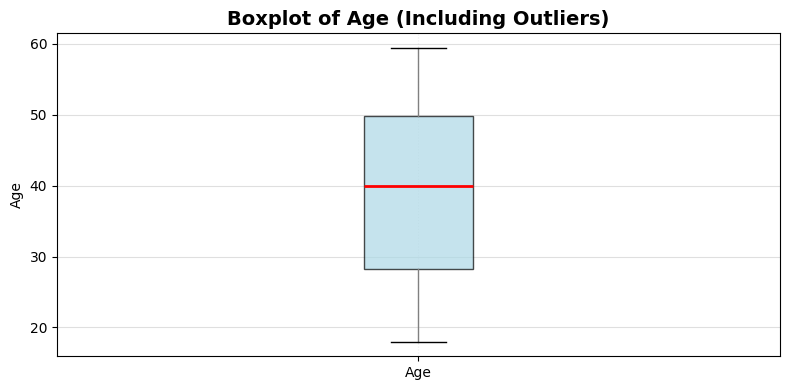

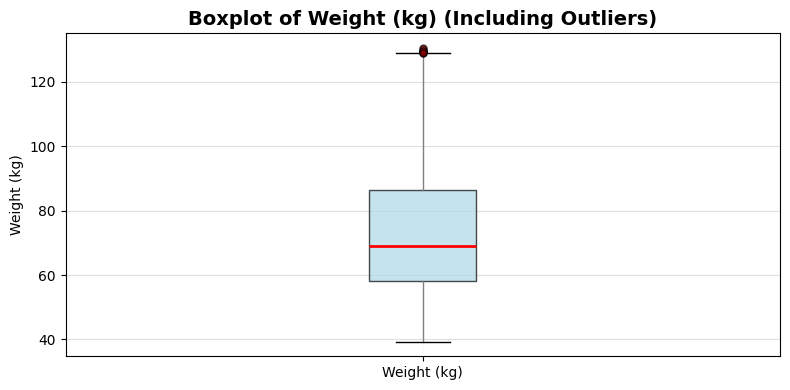

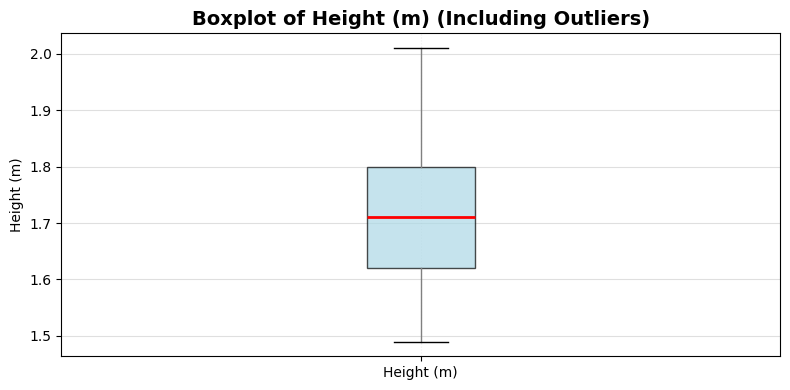

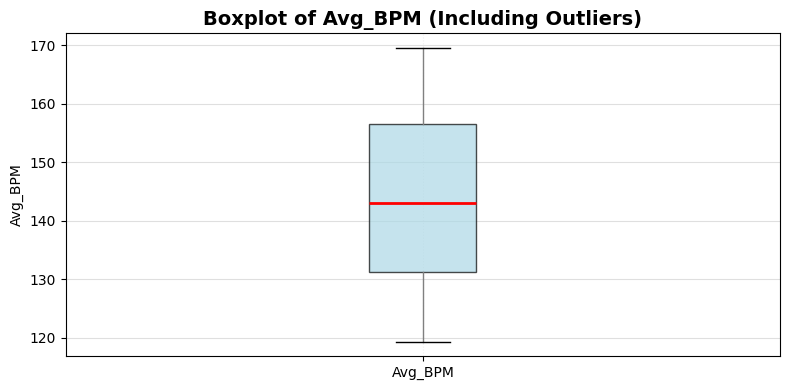

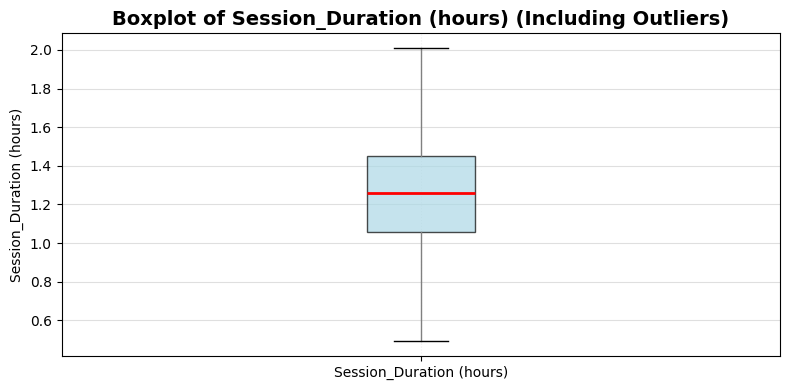

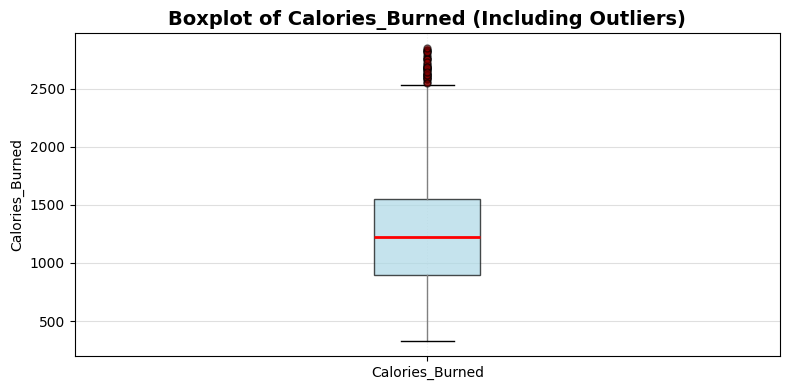

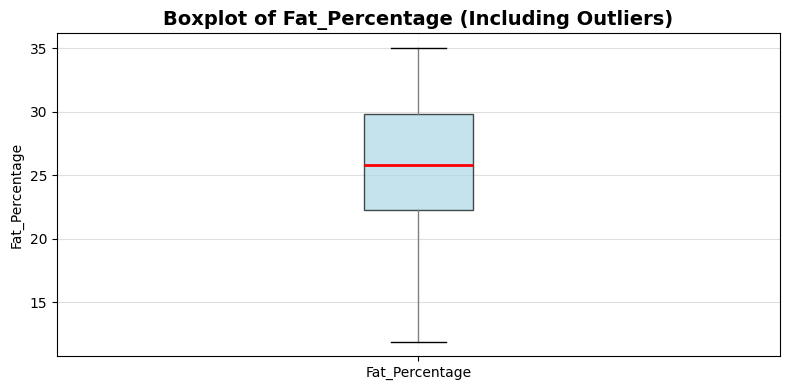

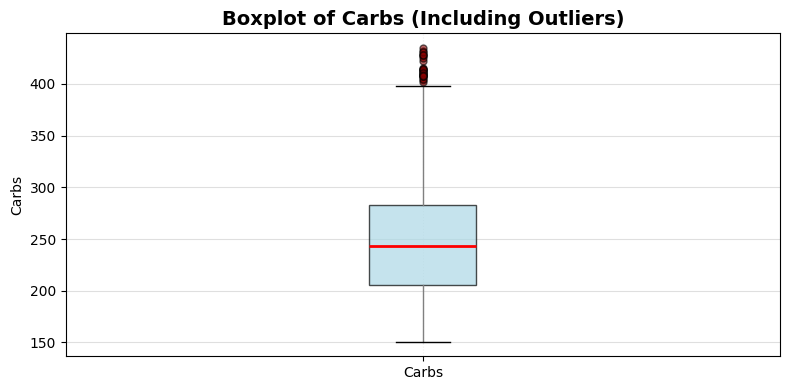

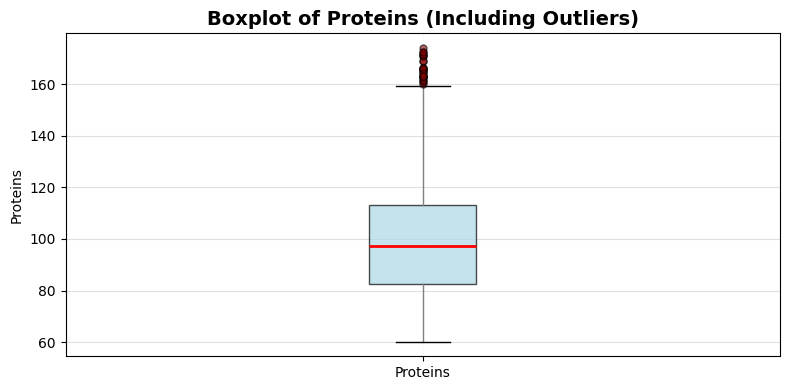

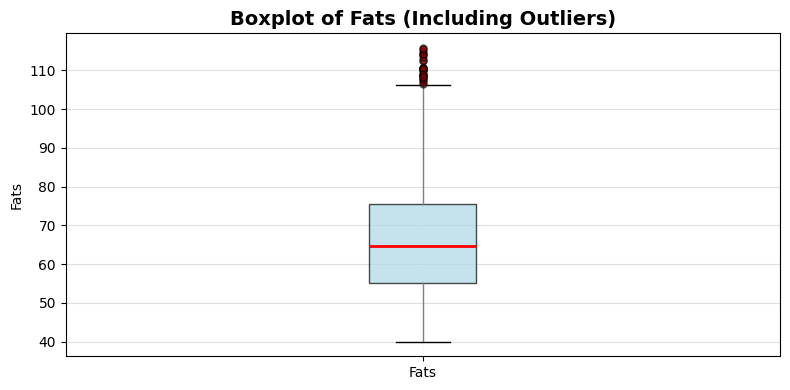

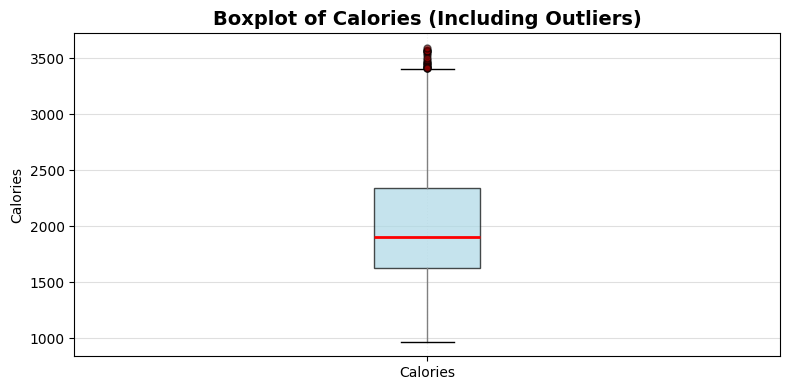

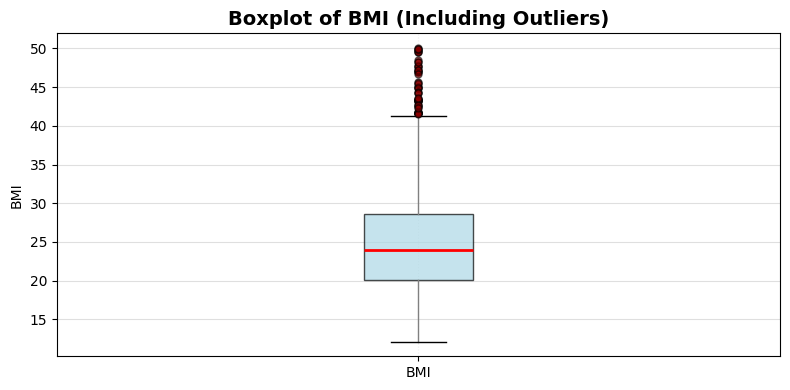

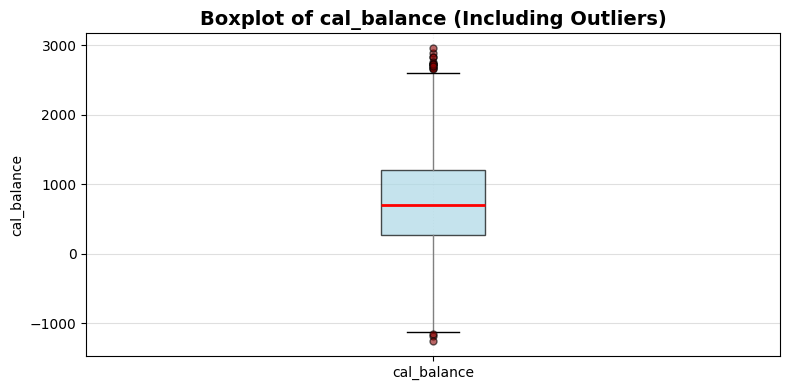

In [ ]:
def plot_boxplot_outliers(series, colname):
    plt.figure(figsize=(8, 4))
    plt.boxplot(
        series,
        vert=True,
        patch_artist=True,
        showfliers=True,
        medianprops=dict(color='red', linewidth=2),
        boxprops=dict(facecolor='lightblue', alpha=0.7),
        whiskerprops=dict(color='gray'),
        flierprops=dict(marker='o', markersize=5, markerfacecolor='darkred', alpha=0.6)
    )

    plt.title(f"Boxplot of {colname} (Including Outliers)", fontsize=14, fontweight='bold')
    plt.xticks([1], [colname])
    plt.ylabel(colname)


    plt.grid(axis='y', linestyle='-', alpha=0.4)
    plt.grid(axis='x', linestyle=':', alpha=0.2)

    plt.tight_layout()
    plt.show()

for col in data.select_dtypes(include=[np.number]).columns:
    plot_boxplot_outliers(data[col], col)


Jelaskan hasil dan bagaimana cara kalian melakukan pengecekan outlier disini.

**Penjelasan:**

Kami menentukan outlier pada data tersebut dengan menggunakan metode IQR dan visualisasi boxplot. Pengecekan outlier dengan menggunakan metode IQR dilakukan dengan menentukan batas atas dan batas bawah suatu data yang dihitung berdasarkan kuartil. Rumusnya:

$$
\text{Batas Atas} = Q3 + 1.5 \times IQR
$$

$$
\text{Batas Bawah} = Q1 - 1.5 \times IQR
$$


Setelah kita menghitung batas bawah dan batas atas untuk setiap data numerik, kita dapat menentukan outlier pada data tersebut, yaitu data yang nilainya lebih dari batas atas atau kurang dari batas bawah.


$$
\text{Outlier} = \text{value} > \text{Batas Atas}
$$

$$
\text{atau}
$$

$$
\text{Outlier} = \text{value} < \text{Batas Bawah}
$$

Metode pengecekan outlier menggunakan IQR ini digunakan karena metode ini dapat lebih mudah untuk mengecek outlier pada data yang relatif tidak berdistribusi normal. Tidak seperti metode Z-Score yang lebih cocok digunakan pada data yang berdistribusi normal, metode IQR ini lebih baik dalam mendeteksi outlier pada data yang relatif skew. Tidak semua data numerik pada kolom dataset tersebut berdistribusi normal, beberapa kolom data pada dataset tersebut relatif cenderung skew. Hal ini dapat dilihat dari statistik deskriptif pada jawaban soal nomor 1 yang menunjukkan beberapa data memiliki nilai skewness lebih dari 0,5 atau kurang dari -0,5. Selain itu, kemiringan data juga dapat dilihat dari visualisasi distribusi data pada jawaban soal nomor 3. Oleh karena itu, kami memilih metode pengecekan outlier menggunakan metode IQR karena lebih cocok untuk data yang skew dan cenderung lebih robust dibandingkan metode Z-Score.

Nah, dari metode tersebut, dapat dilihat bahwa pada kolom Age, Height, Avg_BPM, Session_Duration, Fat Percentage tidak ditemukan outlier. Sementara untuk kolom sisanya memiliki outlier. Pada kolom Weight, ditemukan 10 outlier yang nilainya lebih dari batas atas data pada kolom tersebut (129,13). Kemudian, pada kolom Calories_Burned, ditemukan 35 outlier yang nilainya > batas atas (2540,68). Pada kolom Carbs, ditemukan 28 outlier yang nilainya melebihi batas atas (399,52). Pada kolom Proteins, ditemukan 28 outlier yang nilainya > batas atas data (159,92). Juga terdapat 28 outlier pada kolom Fats yang nilainya melebihi batas atas data pada kolom tersebut (106,33). Sementara pada kolom Calories, terdapat 17 outlier yang nilainya lebih dari 3414,25 yang merupakan batas atas dari kolom tersebut. Pada kolom BMI, ditemukan 51 outlier yang nilainya lebih dari 41,41 (batas atas). Terakhir, pada kolom cal_balance, terdapat 17 outlier di mana 3 outlier memiliki nilai < -1139,57 (batas bawah) dan sisanya memiliki nilai > 2606,12 yang merupakan batas atas pada kolom data tersebut.

Outlier pada data tersebut semakin jelas terlihat setelah dilakukan visualisasi boxplot. Sumbu y pada visualisasi boxplot tersebut menunjukkan rentang nilai data pada kolom tersebut. Sementara, garis merah pada boxplot menunjukkan median data pada kolom tersebut. Garis hitam yang berada di atas dan di bawah boxplot menunjukkan batas atas dan batas bawah untuk menentukan outlier pada data tersebut. Kemudian lingkaran merah yang ada di atas batas atas atau di bawah batas bawah menunjukkan outlier pada data. Dapat dilihat dari visualisasi boxplot tersebut, terdapat beberapa lingkaran merah di atas batas atas untuk data pada kolom Weight, Calories_Burned, Carbs, Proteins, Fats, Calories, BMI, dan cal_balance. Selain itu, juga terdapat beberapa lingkaran merah di bawah batas bawah untuk kolom cal_balance yang menunjukkan outlier pada data tersebut. Visualisasi ini menunjukkan hasil yang sama dengan pengecekan outlier menggunakan metode IQR di atas.

### Penanganan Outlier

Jelaskan metode yang Anda gunakan untuk menangani outlier pada bagian ini, beserta alasan pemilihan metode tersebut.

**Penjelasan**

Kami menggunakan metode capping untuk menangani outlier pada dataset tersebut. Metode capping yang kami gunakan, yaitu dengan mengubah nilai outlier pada dataset tersebut ke batas atas atau batas bawah pada dataset tersebut. Jika outlier memiliki nilai lebih dari batas atas pada suatu kolom data, maka nilainya akan diubah menjadi sama dengan batas atas data tersebut, begitu pun jika suatu outlier nilainya kurang dari batas bawah suatu data, maka akan ditangani dengan mengganti nilainya menjadi sama dengan batas bawah data tersebut. 

Metode ini kami gunakan karena kami merasa outlier yang terdapat pada dataset tersebut masih memiliki nilai yang wajar dan masuk akal. Outlier tersebut terjadi bukan karena adanya kesalahan dalam penulisan data yang menyebabkan nilai datanya menjadi tidak masuk akal. Sehingga, outlier tersebut tidak perlu untuk dihapus. Karena, jika dihapus, akan memengaruhi jumlah ukuran sampel pada data tersebut. Jika dilakukan deletion pada baris data yang memiliki outlier, nantinya akan memengaruhi pengolahan data yang bisa menyebabkan ketidakakuratan dalam melakukan analisis data. Selain itu, mengganti nilai outlier ke batas atas atau batas bawah yang berbasis IQR juga dapat mengurangi distorsi model. Dengan membatasi nilai ekstrem, maka kita dapat mengurangi dampak outlier pada distribusi data. Metode capping ini juga lebih robust dan lebih sesuai diterapkan daripada metode transformation karena data yang relatif skew (tidak berdistribusi normal). Di mana, metode penanganan outlier dengan menggunakan transformasi data lebih cocok diterapkan untuk outlier pada data yang berdistribusi normal.

In [ ]:
def capping(series):
    mask, lower_limit, upper_limit, q1, q3,iqr = outlier(series)
    capped = series.copy()

    for i, val in capped.items():
        if val < lower_limit:
            capped.at[i] = lower_limit
        elif val > upper_limit:
            capped.at[i] = upper_limit

    return capped

def print_capping(series, colname):
    # before capping
    mask_before, _, _, _, _, _ = outlier(series)
    outlier_before = np.sum(mask_before)

    # capping process
    capped = capping(series)

    # after capping
    mask_after, _, _, _, _, _ = outlier(capped)
    outlier_after = np.sum(mask_after)

    print(f"=== capping {colname} ===")
    print("before:")
    print(f"min = {series.min():.5f}, max = {series.max():.5f}")
    print(f"jumlah outlier = {outlier_before}")

    print("after:")
    print(f"min = {capped.min():.5f}, max = {capped.max():.5f}")
    print(f"jumlah outlier = {outlier_after}")

for col in data.select_dtypes(include=[np.number]).columns:
    print_capping(data[col], col)
    print("\n")

=== capping Age ===
before:
min = 18.00000, max = 59.41000
jumlah outlier = 0
after:
min = 18.00000, max = 59.41000
jumlah outlier = 0


=== capping Weight (kg) ===
before:
min = 39.32000, max = 130.55000
jumlah outlier = 10
after:
min = 39.32000, max = 129.12500
jumlah outlier = 0


=== capping Height (m) ===
before:
min = 1.49000, max = 2.01000
jumlah outlier = 0
after:
min = 1.49000, max = 2.01000
jumlah outlier = 0


=== capping Avg_BPM ===
before:
min = 119.35000, max = 169.56000
jumlah outlier = 0
after:
min = 119.35000, max = 169.56000
jumlah outlier = 0


=== capping Session_Duration (hours) ===
before:
min = 0.49000, max = 2.01000
jumlah outlier = 0
after:
min = 0.49000, max = 2.01000
jumlah outlier = 0


=== capping Calories_Burned ===
before:
min = 323.99000, max = 2850.08000
jumlah outlier = 35
after:
min = 323.99000, max = 2540.67625
jumlah outlier = 0


=== capping Fat_Percentage ===
before:
min = 11.92723, max = 35.00000
jumlah outlier = 0
after:
min = 11.92723, max = 35

## Nomor 3
Membuat Visualisasi plot distribusi. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot tersebut. Jika numerik dapat dibuat dalam bentuk histogram dan box plot, dan jika kategorikal dengan histogram.

### Kolom Age

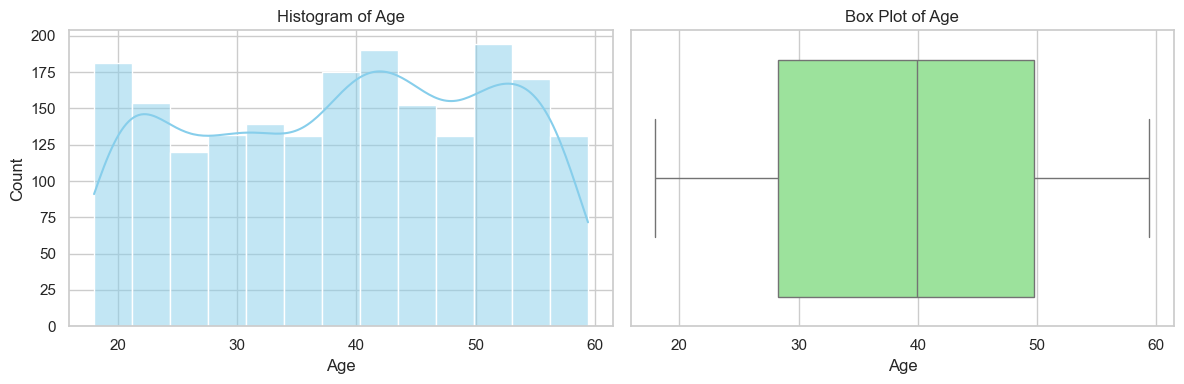

In [ ]:
df = pd.read_csv('Life-Style.csv')

sns.set(style="whitegrid")

numerical_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

def plot_numerical(col_name):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # Histogram
    sns.histplot(df[col_name], kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f'Histogram of {col_name}')
    
    # Boxplot
    sns.boxplot(x=df[col_name], ax=axes[1], color='lightgreen')
    axes[1].set_title(f'Box Plot of {col_name}')
    
    plt.tight_layout()
    #plt.savefig(f'{col_name}_plot.png')
    plt.show()

def plot_categorical(col_name):
    plt.figure(figsize=(8, 4))
    
    # Countplot (Histogram for categorical)
    sns.countplot(x=df[col_name], hue=df[col_name], palette='pastel', legend=False)
    plt.title(f'Distribution of {col_name}')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    #plt.savefig(f'{col_name}_plot.png')
    plt.show()

#for col in numerical_cols:
plot_numerical(numerical_cols[0])



Penjelasan:

### Kolom Weight


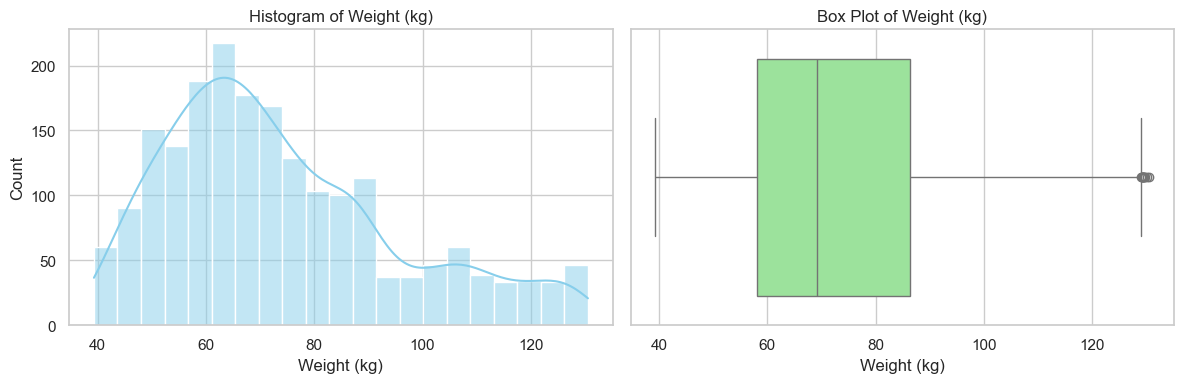

In [ ]:
plot_numerical(numerical_cols[1])

### Kolom Height

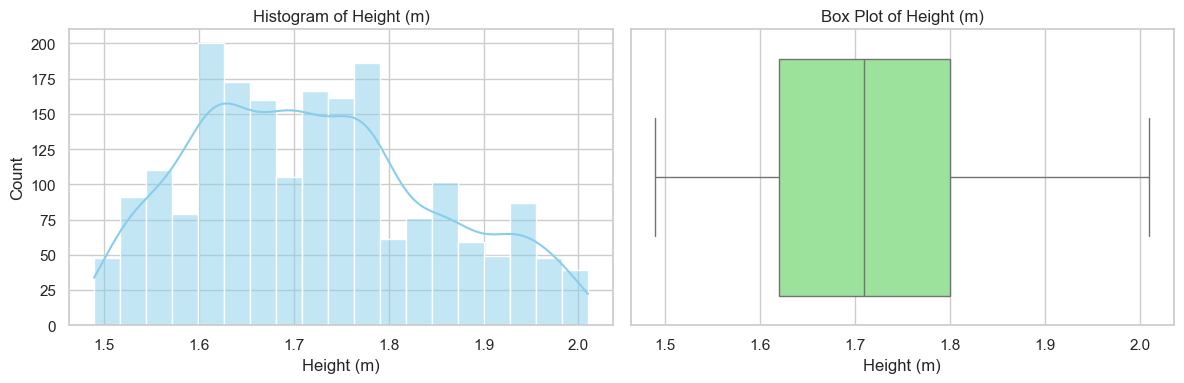

In [ ]:
plot_numerical(numerical_cols[2])

### Kolom AVG_BPM

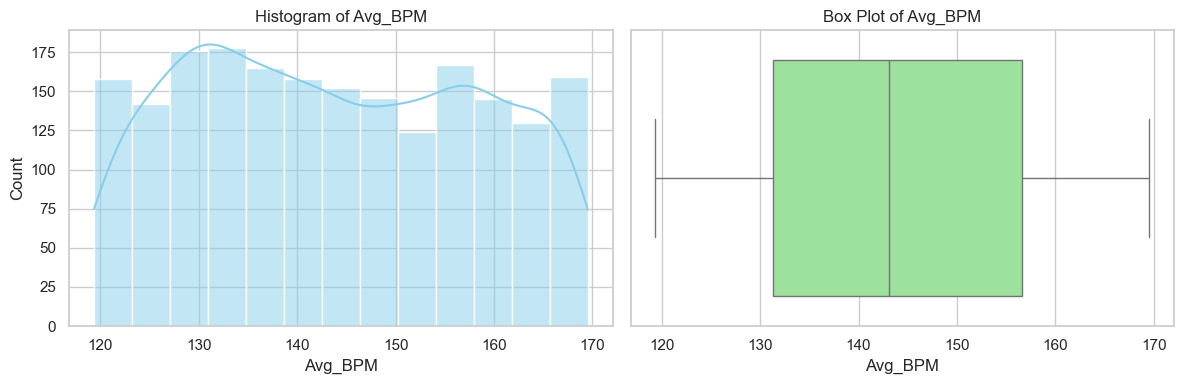

In [ ]:
plot_numerical(numerical_cols[3])

### Session_Duration

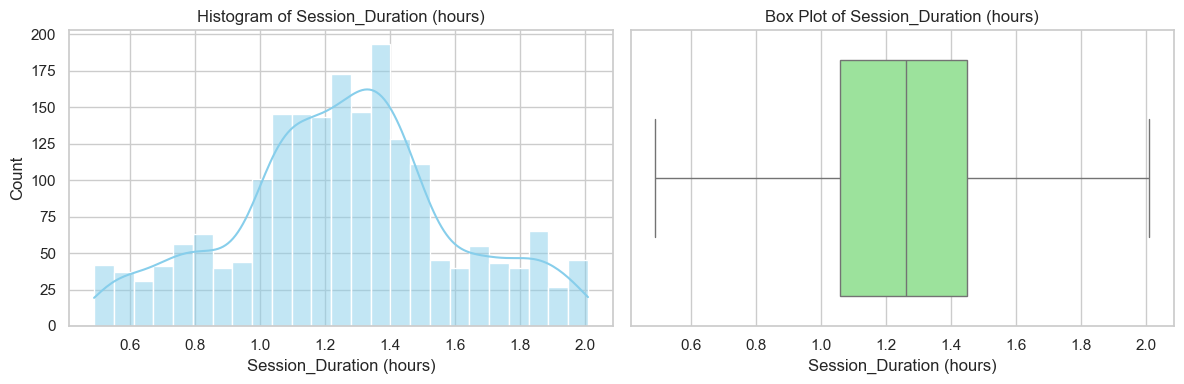

In [ ]:
plot_numerical(numerical_cols[4])

### Kolom Calories_Burned

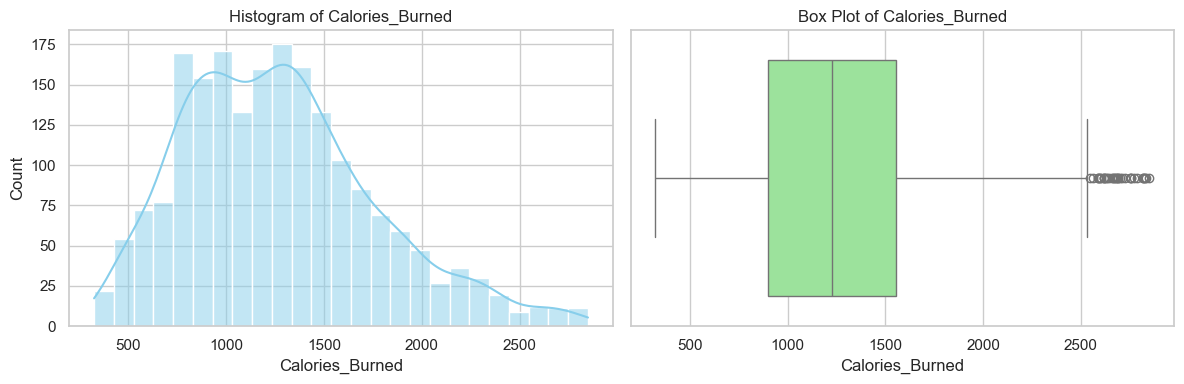

In [ ]:
plot_numerical(numerical_cols[5])

### Kolom Fat_Percentage

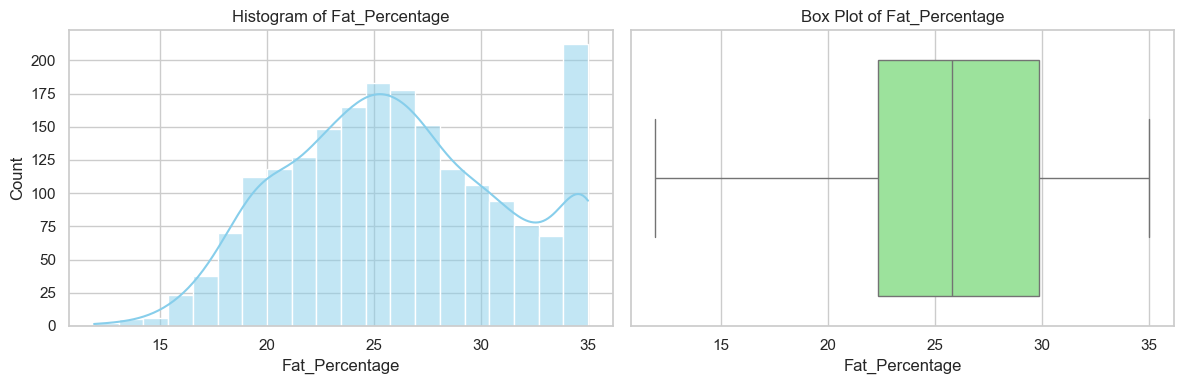

In [ ]:
plot_numerical(numerical_cols[6])

### Kolom Carbs

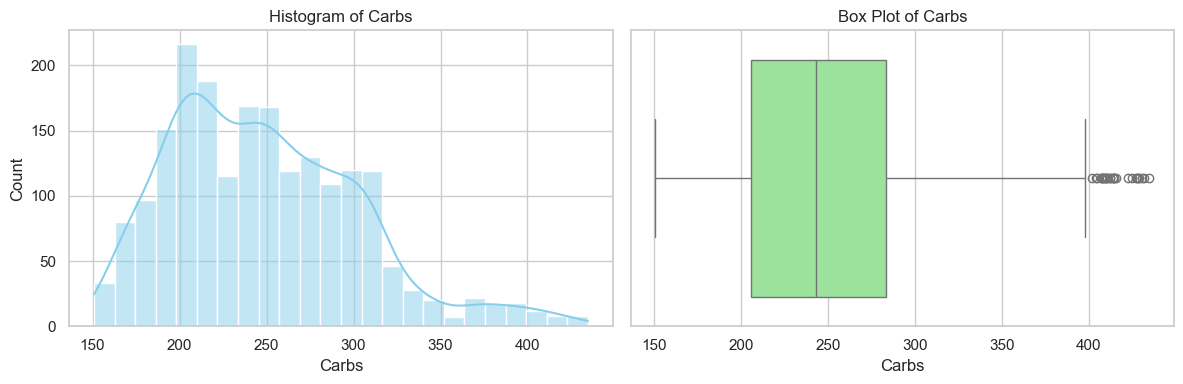

In [ ]:
plot_numerical(numerical_cols[7])

### Kolom Proteins

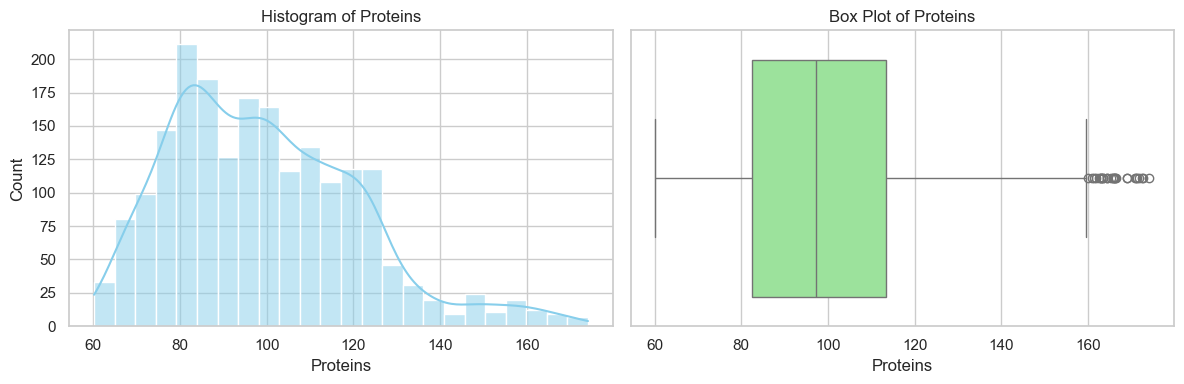

In [ ]:
plot_numerical(numerical_cols[8])

### Kolom Fats

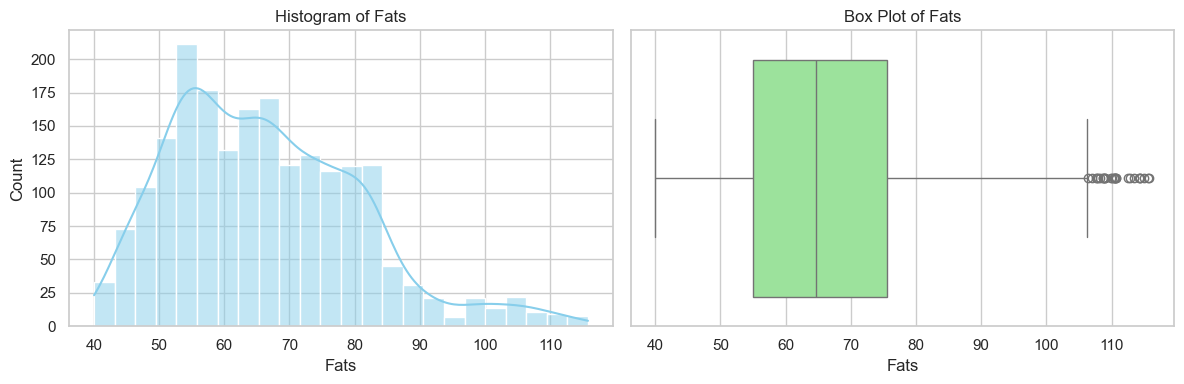

In [ ]:
plot_numerical(numerical_cols[9])

### Kolom Calories

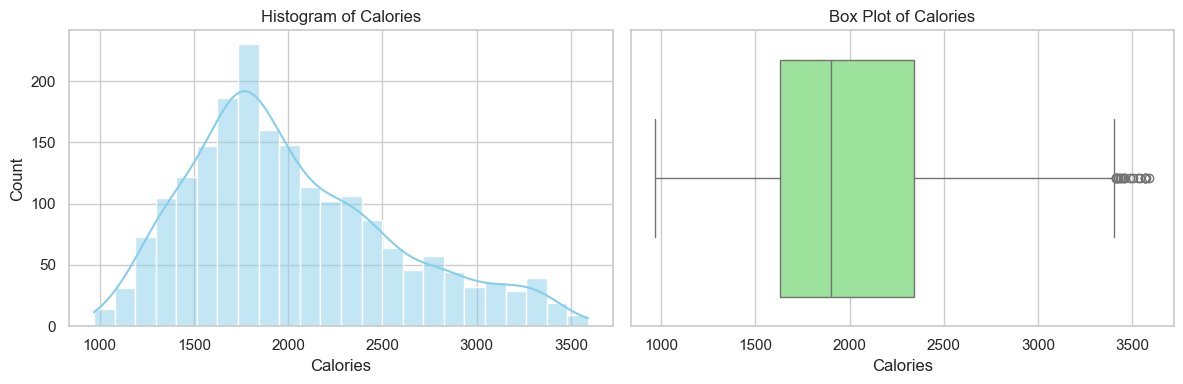

In [ ]:
plot_numerical(numerical_cols[10])

### Kolom BMI

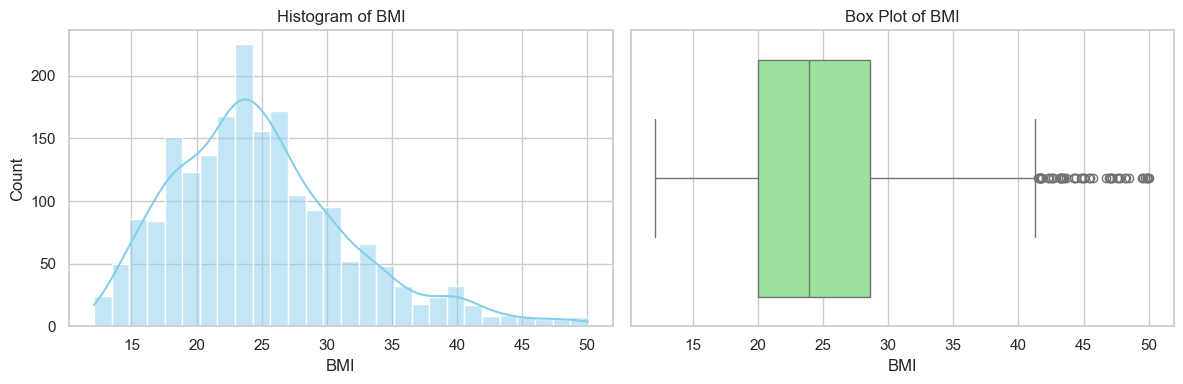

In [ ]:
plot_numerical(numerical_cols[11])

### Kolom cal_balance

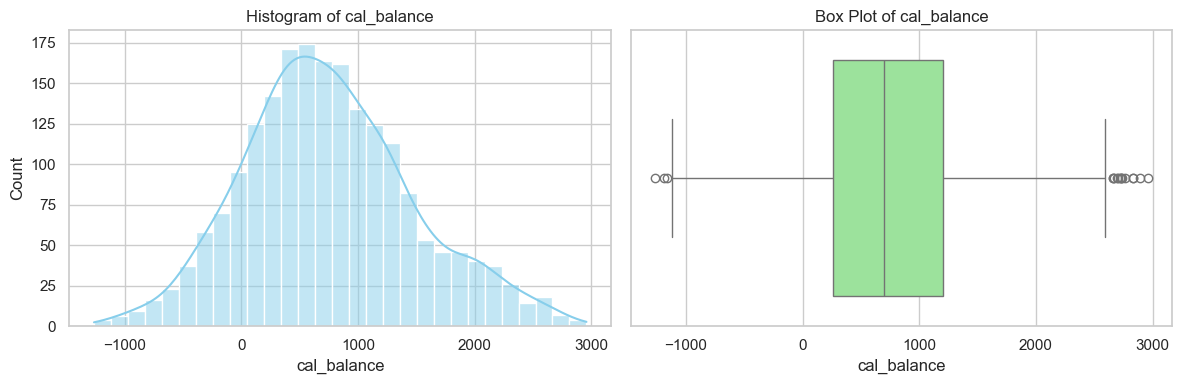

In [ ]:
plot_numerical(numerical_cols[12])

### Kolom Gender

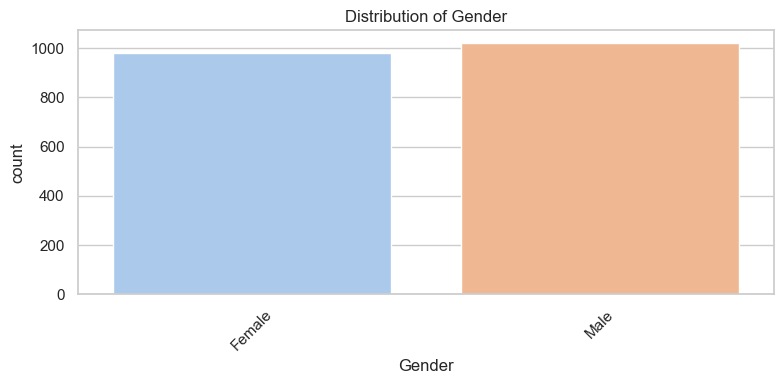

In [ ]:
plot_categorical(categorical_cols[0])

### Kolom Workout_Type

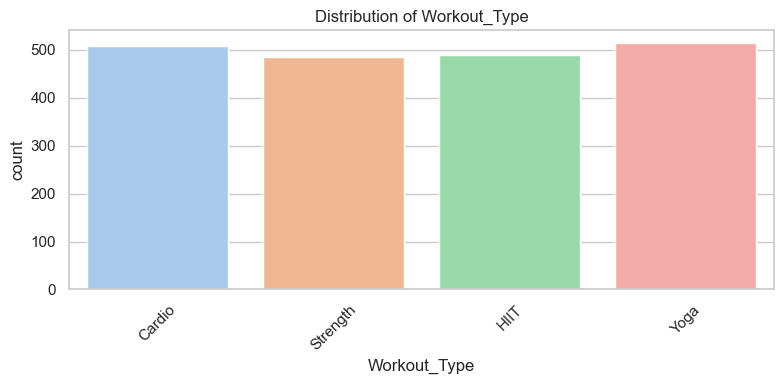

In [ ]:
plot_categorical(categorical_cols[1])

### Kolom diet_type

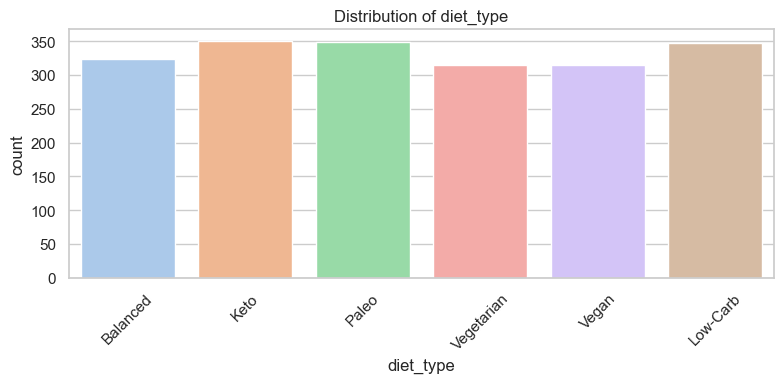

In [ ]:
plot_categorical(categorical_cols[2])

### Kolom ...

Jelaskan kondisi kolom ... berdasarkan hasil plot distribusi disini.

In [ ]:
# Tulis kode visualisasi plot distribusi kolom ... kalian disini

## Nomor 4
Menentukan distribusi setiap kolom numerik menggunakan hasil visualisasi histogram. Apakah kolom tersebut berdistribusi normal? Jika bukan, terdistribusi seperti apa kolom tersebut?

In [ ]:
def print_skew(series):
    print(f"Statistik Distribusi {series.name}")
    print(f"Modus = {modus(series)}")
    print(f"Mean = {mean(series)}")
    print(f"Median = {median(series)}")
    print(f"Skewness = {skewness(series)}")
    print(f"Kurtosis = {kurtosis(series)}")

for col in data.select_dtypes(include=[np.number]).columns:
    print_skew(data[col])
    print("\n")


Statistik Distribusi Age
Modus = [18.0]
Mean = 38.93884
Median = 39.915
Skewness = -0.11318481373554645
Kurtosis = -1.193879700678127


Statistik Distribusi Weight (kg)
Modus = [88.13]
Mean = 73.819975
Median = 69.15
Skewness = 0.7982443795815005
Kurtosis = -0.042532776259933236


Statistik Distribusi Height (m)
Modus = [1.68]
Mean = 1.7211349999999999
Median = 1.71
Skewness = 0.3299487232867744
Kurtosis = -0.7073782665699158


Statistik Distribusi Avg_BPM
Modus = [120.14, 131.0, 138.96, 123.12, 166.91, 149.8]
Mean = 143.86243
Median = 143.07
Skewness = 0.08385579817302513
Kurtosis = -1.209211556356027


Statistik Distribusi Session_Duration (hours)
Modus = [1.26]
Mean = 1.25624
Median = 1.26
Skewness = -0.011929133135400359
Kurtosis = -0.2511467616717682


Statistik Distribusi Calories_Burned
Modus = [1248.0]
Mean = 1269.7806799999998
Median = 1226.145
Skewness = 0.640533953596304
Kurtosis = 0.17241774473542737


Statistik Distribusi Fat_Percentage
Modus = [35.0]
Mean = 26.09824299110

**Penjelasan:**

Pada data berdistribusi normal, sebagian besar nilainya akan berada di mean atau rata-ratanya dan visualisasinya akan berbentuk seperti lonceng atau bukit. Selain itu, data yang berdsitribusi normal cenderung memiliki nilai modus, median, dan mean yang sama. Jika dilihat dari kemiringannya, data berdistribusi normal cenderung simetris (tidak miring kiri atau miring kanan). Data berdistribusi normal secara persebaran datanya juga tidak terlalu datar atau landai, namun juga tidak terlalu runcing. Berdasarkan hasil visualisasi plot distribusi dengan menggunakan histogram dan boxplot untuk setiap data numerik, maka kita dapat menentukan distribusi suatu kolom sebagai berikut:

### 1. Age
Dilihat dari kemiringannya, persebaran data pada kolom Age ini cenderung simetris. Tidak terdapat data yang cenderung menumpuk di kiri atau di kanan data. Namun, jika dilihat dari kurtosisnya, persebaran data pada kolom Age cenderung merata pada setiap nilainya. Hal ini terlihat dari visualisasi histogram datanya yang cenderung datar, sehingga data ini tidak berdistribusi normal, melainkan platykurtic (datar). Pernyataan ini juga didukung oleh statistik data pada output kode di atas. Di mana, nilai kurtosis datanya = -1,19 yang menunjukkan data tidak berdistribusi normal (kurtosis = 0).

### 2. Weight
Visualisasi histogram untuk data pada kolom Weight menunjukkan adanya ketidakmerataan distribusi data. Berdasarkan visualisasi tersebut, dapat disimpulkan bahwa data menumpuk di bagian kiri yang menyebabkan data memiliki ekor yang panjang di bagian kanan. Karena itulah, data untuk kolom Weight ini tidak berdistribusi normal dan disebut sebagai data yang positive skew, yaitu data yang ekornya panjang di sebelah kanan. Hal ini ditunjukkan juga dari nilai skewnessnya yang sama dengan 0,79 yang menunjukkan bahwa data memang positive skew.

### 3. Height
Berdasarkan visualisasi histogramnya untuk kolom data Height, distribusi data pada kolom data Height cenderung menumpuk di bagian tengah data. Namun, jika dilihat lebih seksama, data pada kolom Height ini seperti memiliki dua atau lebih puncak data. Hal ini terlihat dari persebaran data yang kurang lebih sama pada nilai data = 1,6 dan di rentang 1,7 - 1,8. Berdasarkan statistiknya, nilai kurtosis untuk data Height = -0,71 (kurang dari -0,5) yang menunjukkan kalau data memiliki persebaran yang hampir datar (puncak banyak). Oleh karena itu, data pada kolom Height bukan merupakan data berdistribusi normal, melainkan platykurtic atau bimodal.

### 4. Avg_BPM
Apabila dilihat dari visualisasi histogramnya, data pada kolom Avg_BPM bukan merupakan data berdistribusi normal. Hal ini dikarenakan data tidak berbentuk seperti lonceng atau bukit yang persebaran datanya sebagian besar menumpuk di daerah mean atau median. Dapat dilihat dari visualisasi tersebut, persebaran data pada kolom Avg_BPM cenderung merata pada setiap nilainya, sehingga disebut sebagai data yang platykurtic (datar). Hal ini juga didukung oleh statistik distribusi datanya yang menunjukkan nilai kurtosisnya = -1,21 (kurang dari -0,5 sehingga dapat dianggap bahwa data platykurtic).

### 5. Session_Duration
Berdasarkan visualisasi histogramnya, data untuk kolom Session_Duration dapat dikategorikan sebagai data yang berdistribusi normal. Hal ini ditunjukkan dengan persebaran datanya yang menumpuk di tengah atau median. Kemudian, dilihat dari statistik deskriptifnya, nilai modus, mean, dan mediannya kurang lebih sama yaitu bernilai 1,26 yang menunjukkan data terdistribusi normal. Selain itu, panjang ekor kanan dan kiri datanya juga sama yang menunjukkan data simetris (tidak condong kanan atau kiri). 

### 6. Calories_Burned
Visualisasi histogram untuk data pada kolom Calories_Burned menunjukkan kalau sebagian besar data menumpuk di bagian kiri data. Dapat dilihat dari visualisasi tersebut, data menumpuk pada rentang nilai 1000 - 1500, menyebabkan ekor sebelah kanannya menjadi lebih panjang. Karena datanya tidak simetris, maka data tidak dapat dikategorikan sebagai data yang berdistribusi normal, melainkan datanya relatif positive skew. Berdasarkan statistiknya, nilai skewness untuk data pada kolom Calories_Burned adalah 0,64 (lebih dari 0,5) yang menunjukkan kalau data lebih condong ke kanan (memiliki ekor yang panjang di kanan).

### 7. Fat_Percentage
Jika dilihat dari visualisasi histogramnya, sebagian besar data pada kolom Fat_Percentage terkumpul di bagian tengah data. Hal ini ditunjukkan dengan bentuk datanya yang seperti lonceng (bell shaped). Namun, jika dilihat dari puncak datanya, data pada kolom Fat_Percentage ini memiliki lebih dari satu puncak. Dari visualisasi tersebut dapat dilihat, bahwa terdapat puncak lain pada data yang nilainya = 35. Hal ini juga didukung dari statistiknya yang menyatakan bahwa modusnya memiliki nilai = 35, sementara mean dan mediannya berada di rentang 25-26. Berdasarkan pernyataan tersebut, data pada kolom Fat_Percentage tidak dapat dikatakan berdistribusi normal, melainkan berdistribusi bimodal (memiliki dua puncak).

### 8. Carbs
Pada data untuk kolom Carbs ini, sebagian besar datanya terlihat menumpuk di sisi kiri data. Pada rentang nilai 200 - 250, jumlah frekuensi datanya cukup tinggi jika dibandingkan dengan bagian kanannya (rentang nilai data > 300). Hal ini menunjukkan bahwa data tidak berdistribusi normal, namun positive skew. Hal ini didukung dari statistiknya yang menyatakan nilai skewness data tersebut = 0.71 (lebih dari 0,5), sehingga data dapat dikatakan positive skew (tidak simetris).

### 9. Proteins
Salah satu syarat sebuah data dikatakan berdistribusi normal adalah jika data tersebut memiliki persebaran data yang simetris, dengan puncak datanya berada di tengah. Pada visualisasi histogram untuk kolom data Proteins, dapat dilihat bahwa persebarannya tidak simetris. Sebagian besar data cenderung menumpuk di sebelah kiri yang menunjukkan kalau data tersebut memiliki ekor yang lebih panjang di kanan (miring ke kanan). Oleh karena itu, data pada kolom Proteins dapat disebut sebagai data yang positive skew.

### 10. Fats
Hampir sama seperti kolom data sebelumnya, persebaran data pada kolom Fats juga cenderung tidak simetris. Sebagian besar datanya cenderugn menumpuk di sebelah kiri, menyebabkan sebelah kanannya memiliki ekor yang panjang. Ditinjau dari statistiknya juga, nilai skewness untuk kolom Fats = 0,70, menujukkan kalau datanya memang positive skew (condong ke kanan) dan bukan merupakan data yang terdistribusi normal.

### 11. Calories
Berdasarkan visualisasi histogram untuk data pada kolom Calories, data tersebut dapat dikategorikan sebagai data yang positive skew. Hal ini dikarenakan data tersebut tidak simetris, sehingga tidak dapat dikategorikan sebagai data yang berdistribusi normal. Sebagian besar datanya menumpuk di sebelah kiri. Dilihat dari statistiknya, nilai skewness untuk kolom data tersebut = 0,69, menunjukkan kalau data ini memang skew ke kanan.

### 12. BMI
Visualisasi histogram untuk data pada kolom BMI menunjukkan bahwa data tersebut memiliki satu puncak, yang memenuhi syarat data tersebut berdistribusi normal. Namun, visualisasi histogram data tersebut menunjukkan kalau data tersebut tidak simetri, sehingga data BMI tidak dapat dikatakan sebagai data yang berdistribusi normal. Data tersebut cenderung memiliki ekor yang panjang di sebelah kanan, dengan sebagian besar datanya menumpuk di sebelah kiri. Jika dilihat dari nilai skewnessnya, data tersebut memiliki nilai skewness = 0,82, yang berarti data tersebut tergolong sebagai data yang positive skew.

### 13. cal_balance
Dilihat dari visualisasi histogramnya, data pada kolom cal_balance memiliki satu puncak di tengah. Bentuk distribusi data pada kolom cal_balance menyerupai bentuk lonceng (bell shaped). Selain itu, dilihat dari kemiringan dan kesimetrisannya, data tersebut juga cenderung simetris. Ekor kanan dan kirinya sama, juga tidak terdapat beberapa puncak yang menunjukkan kalau data merupakan data mesokurtic. Ditinjau dari statistiknya, data tersebut memiliki nilai skewness = 0,31 dan nilai kurtosis = -0,02. Keduanya masih di bawah batas wajar (0,5 atau -0,5) sehingga data pada kolom cal_balance dapat dikategorikan sebagai data yang berdistribusi normal.

# Soal Spesifik Dataset

Enam Langkah Testing:

1.  Tentukan Hipotesis nol (H0: θ = θ0), dimana θ bisa berupa μ, σ2, p, atau data lain berdistribusi tertentu (normal, binomial, dsc.).
2. Pilih hipotesis alternatif H1 salah dari dari θ > θ0, θ < θ0, atau θ ≠ θ0.
3. Tentukan tingkat signifikan α.
4. Tentukan uji statistik yang sesuai dan tentukan daerah kritis.
5. Hitung nilai uji statistik dari data sample. Hitung p-value sesuai dengan uji statistik yang digunakan.
6. Ambil keputusan dengan TOLAK H0 jika nilai uji terletak di daerah kritis atau dengan tes signifikan, TOLAK H0 jika p-value lebih kecil dibanding tingkat signifikansi α yang diinginkan

## Nomor 5 : Hipotesis 1 Sampel

1. Pertanyaan 1
2. Pertanyaan 2
3. Pertanyaan 3
4. Pertanyaan 4


### 5.1
Pertanyaan 1

In [ ]:
bmi = data['BMI']

print("Diketahui:")
x = np.mean(bmi) #rata rata sampel
mu = 25 #rata rata populasi
alpha = 0.05 
n = len(bmi) #jumlah sampel
s = np.std(bmi) #standar deviasi sampel
print(f"x̄ =", x)
print(f"α =", alpha)
print(f"n =", n)
print(f"s =", s)

# Langkah 1: Menentukan H0
print("\nLangkah 1: Menentukan hipotesis nol")
print(f"H0: μ <= 25 \n(rata-rata BMI populasi tidak lebih dari 25)")

# Langkah 2: Menentukan H1
print("\nLangkah 2: Menentukan hipotesis alternatif")
print(f"H1: μ > 25 \n(rata-rata BMI populasi lebih dari 25)")

# Langkah 3: Menentukan tingkat signifikansi
print("\nLangkah 3: Menentukan tingkat signifikansi")
print(f"α = {alpha}")

# Langkah 4: Menentukan statistik uji
print("\nLangkah 4: Menentukan statistik uji")
print("Menggunakan uji z karena n > 30 dan σ tidak diketahui")

# Langkah 5: Menghitung statistik
print("\nLangkah 5: Menghitung uji statistik")
print("z = (x̄ - μ) / (s/√n)")
z = (x - mu)/(s/np.sqrt(n))
print(f"z = {z}")
z_alpha = stats.norm.ppf(1 - alpha/2)
print(f"z_alpha/2 = {z_alpha}")

# Langkah 6: Ambil Keputusan
print("\nLangkah 6: Ambil Keputusan")
print(f"{z} <= {z_alpha} ")
print("Karena z <= z_alpha, maka gagal tolak H0. Jadi, rata-rata BMI populasi tidak lebih dari 25.")


Diketahui:
x̄ = 24.96491
α = 0.05
n = 2000
s = 6.881071304084852

Langkah 1: Menentukan hipotesis nol
H0: μ <= 25 
(rata-rata BMI populasi tidak lebih dari 25)

Langkah 2: Menentukan hipotesis alternatif
H1: μ > 25 
(rata-rata BMI populasi lebih dari 25)

Langkah 3: Menentukan tingkat signifikansi
α = 0.05

Langkah 4: Menentukan statistik uji
Menggunakan uji z karena n > 30 dan σ tidak diketahui

Langkah 5: Menghitung uji statistik
z = (x̄ - μ) / (s/√n)
z = -0.22805642279535582
z_alpha/2 = 1.959963984540054

Langkah 6: Ambil Keputusan
-0.22805642279535582 <= 1.959963984540054 
Karena z <= z_alpha, maka gagal tolak H0. Jadi, rata-rata BMI populasi tidak lebih dari 25.


### 5.2
Pertanyaan 2

In [ ]:
# Tulis kode kalian disini dengan mengikuti 6 langkah testing.

### 5.3
Pertanyaan 3

In [ ]:
# Tulis kode kalian disini dengan mengikuti 6 langkah testing.

### 5.4
Pertanyaan 4

In [ ]:
# Tulis kode kalian disini dengan mengikuti 6 langkah testing.

## Nomor 6 : Hipotesis 2 Sampel
1. Pertanyaan 1
2. Pertanyaan 2
3. Pertanyaan 3
4. Pertanyaan 4

### 6.1
Pertanyaan 1

In [ ]:
# Tulis kode kalian disini dengan mengikuti 6 langkah testing.

### 6.2
Pertanyaan 2

In [ ]:
# Tulis kode kalian disini dengan mengikuti 6 langkah testing.

### 6.3
Pertanyaan 3

In [ ]:
# Tulis kode kalian disini dengan mengikuti 6 langkah testing.

### 6.4
Pertanyaan 4

In [ ]:
# Tulis kode kalian disini dengan mengikuti 6 langkah testing.